# Conductors

This notebook asks whether the prime powers of the conductor provide good features to discriminate the rank in comparison with the _a_ and _b_ variables.

In [40]:
import pandas as pd
import numpy as np

dffile = "./data/ec_rk0-2_cond1000-10000.csv"

df = pd.read_csv(dffile)

# set prime range 
nprimes = 100
first = 1
rg = range(first,first + nprimes)

# set b-variables
a = ['a'+str(j) for j in rg]
for j in rg:
    df['b'+str(j)] = df[a[:j]].mean(axis=1)
    
df

,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,b91,b92,b93,b94,b95,b96,b97,b98,b99,b100
0,1001.b1,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
1,1001.b2,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
2,1001.b3,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
3,1001.b4,0,1001,-1,0,-2,-1,1,-1,-2,...,2.373626,2.608696,2.924731,3.191489,3.115789,3.083333,3.360825,3.020408,2.787879,3.14
4,1002.a1,0,1002,-1,-1,0,0,0,-4,6,...,1.307692,1.554348,1.365591,1.436170,1.231579,0.968750,1.061856,0.948980,0.696970,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,1,-1,-4,1,-4,-6,-1,...,-1.857143,-1.445652,-1.591398,-1.744681,-1.747368,-1.708333,-1.742268,-2.000000,-2.414141,-2.73
59569,9963.c1,2,9963,0,0,-2,-4,2,-1,-2,...,0.637363,0.413043,0.677419,0.776596,0.305263,0.177083,0.587629,0.397959,0.484848,0.38
59570,9966.c1,2,9966,1,-1,-3,-4,-1,-3,-4,...,-1.186813,-1.391304,-0.967742,-0.968085,-0.905263,-0.697917,-1.061856,-1.275510,-1.404040,-1.43
59571,9978.a1,2,9978,-1,-1,-2,-1,-1,-2,-5,...,-1.065934,-0.826087,-0.903226,-1.106383,-0.715789,-0.583333,-0.670103,-1.071429,-0.858586,-1.05


Start by extracting prime factorisations of the conductors:

In [59]:
cf = [list(factor(c)) for c in df['conductor']]
cprimes = [x[0] for x in list(set(sum(cf, [])))]
cprimes = sorted(list(set(cprimes)))

print(f'Dividing conductors: {len(cprimes)} primes, max = {max(cprimes)} = {Primes().rank(max(cprimes))+1}-th prime')

Dividing conductors: 666 primes, max = 9967 = 1228-th prime


Augment the data frame by _c_ variables: prime exponents labeled by prime (1-up index). Takes about 10 minutes to run. 

In [51]:
import time

mp = max([Primes().rank(p) for p in cprimes])

# add c-variables to df ...
for i in range(1,mp+2): 
    # mp+2 for 1-up counting of primes
    c = 'c'+str(i)
    df[c] = 0
    
# ... assign to each its prime exponent in the conductor
start = time.time()
for i in range(df.shape[0]):
    c = df['conductor'][i]
    pf = list(factor(c))
    for p in pf:
        j = Primes().rank(p[0]) + 1 
        # +1 for 1-up counting of primes
        v = 'c'+str(j)
        df[v][i] = p[1]
end = time.time()
print(f'Running time: {end - start}')
        
display(df)

Running time: 533.9605898857117


,ec,rank,conductor,a1,a2,a3,a4,a5,a6,a7,...,c1219,c1220,c1221,c1222,c1223,c1224,c1225,c1226,c1227,c1228
0,1001.b1,0,1001,-1,0,-2,-1,1,-1,-2,...,0,0,0,0,0,0,0,0,0,0
1,1001.b2,0,1001,-1,0,-2,-1,1,-1,-2,...,0,0,0,0,0,0,0,0,0,0
2,1001.b3,0,1001,-1,0,-2,-1,1,-1,-2,...,0,0,0,0,0,0,0,0,0,0
3,1001.b4,0,1001,-1,0,-2,-1,1,-1,-2,...,0,0,0,0,0,0,0,0,0,0
4,1002.a1,0,1002,-1,-1,0,0,0,-4,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59568,9962.a1,2,9962,1,-1,-4,1,-4,-6,-1,...,0,0,0,0,0,0,0,0,0,0
59569,9963.c1,2,9963,0,0,-2,-4,2,-1,-2,...,0,0,0,0,0,0,0,0,0,0
59570,9966.c1,2,9966,1,-1,-3,-4,-1,-3,-4,...,0,0,0,0,0,0,0,0,0,0
59571,9978.a1,2,9978,-1,-1,-2,-1,-1,-2,-5,...,0,0,0,0,0,0,0,0,0,0


Check that sampled entries are correct: 

In [61]:
i = randint(0,df.shape[0]-1)
j = randint(1,Primes().rank(max(cprimes)))

E = EllipticCurve(QQ, df['ec'].values[i])
p = Primes().unrank(j-1)
c = ['c' + str(j) for j in range(1,Primes().rank(max(cprimes))+2)]

print(E)
print(f'Prime {p}')
print(f'Check conductor = {df["conductor"].values[i]} ... {E.conductor() == df["conductor"].values[i]}')
print(f'Check {[(x,df[x].iloc[i]) for x in c if df[x].iloc[i] != 0]} = {cf[i]}')

Elliptic Curve defined by y^2 = x^3 - 948*x - 11203 over Rational Field
Prime 5443
Check conductor = 2340 ... True
Check [('c1', 2), ('c2', 2), ('c3', 1), ('c6', 1)] = [(2, 2), (3, 2), (5, 1), (13, 1)]


## Murmuration view

The _c_ variables are necessarily sparse, so we won't see interesting averages beyond the first few primes. Looking at the first 9, we also see little or no discrimination between ranks 0 and 1 on average:

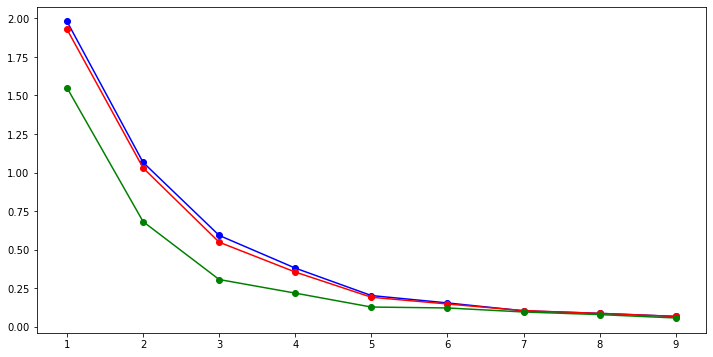

In [76]:
import numpy as np
from matplotlib import pyplot as plt

rg = range(1,10)
murmur = []
for r in range(3):
    murmur += [[np.mean(df['c'+str(i)][(df["rank"]==r)]) for i in rg]]

plt.figure(figsize=(12,6))
plt.plot(rg, murmur[0], 'b-o')
plt.plot(rg, murmur[1], 'r-o')
plt.plot(rg, murmur[2], 'g-o')
plt.show()

## t-SNE view

Use the _c_ variables to generate a t-SNE plot:

In [80]:
from sklearn.manifold import TSNE

# sample rows uniformly
#ssize = 10000
#idx = sorted([choice(range(0,df.shape[0])) for _ in range(ssize)])

# or by size of conductor
idx = [i for i in range(df.shape[0]) if df["conductor"][i] > 8000]

# extract features to use
nprimes = 1000
idy = ['c'+str(i) for i in range(1,nprimes + 1)] # just conductor divisors
#idy += ['b'+str(i) for i in range(1,nprimes + 1)] # b-variables too

# high-dimensional array
X = df[idy].iloc[idx].to_numpy()

# t-SNE computation
X_tsne = TSNE(n_components = 2).fit_transform(X)
print(f'tSNE frame {X_tsne.shape}')

tSNE frame (13332, 2)


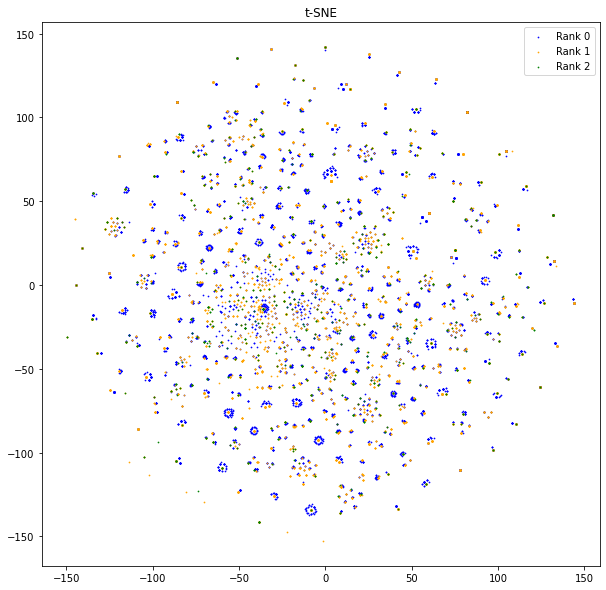

In [81]:
from matplotlib import pyplot as plt
from matplotlib import rc


df_proj = df.iloc[idx][['ec','rank','conductor']]

df_proj['x1'] = X_tsne[:,0]
df_proj['x2'] = X_tsne[:,1]

rc('figure', figsize=(10, 10))

c = df_proj['rank']
col = ['blue', 'orange', 'green']

# t-SNE
fig, ax = plt.subplots()
for i in range(3):
    x = df_proj['x1'][c==i], 
    y = df_proj['x2'][c==i], 
    ax.scatter(x, y,
               s = 0.5,
               c=col[i], 
               label='Rank '+str(i))
ax.legend()
ax.grid(False)
plt.title('t-SNE')
plt.show()

Whether we include the _b_ variables or not, we appear to get no improvement using the _c_s.